In [2]:
import pandas as pd # for dataframes
from matplotlib import pyplot as plt # for simple plots
import seaborn as sns # for slightly more complicated plots
import numpy as np # for numerical computing and linear algebra data structures and algorithms
from numba import jit # for JIT compilation facilties for improved efficiency

In [3]:
pokemon = pd.read_csv('./data/Pokemon.csv', index_col=0, encoding='latin1')

In [4]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
pokemon['Type 1'].value_counts()

Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [6]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [7]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


<AxesSubplot:xlabel='Attack', ylabel='Count'>

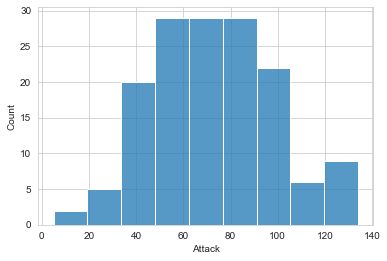

In [7]:
sns.histplot(data=pokemon, x='Attack')

<AxesSubplot:xlabel='Defense', ylabel='Count'>

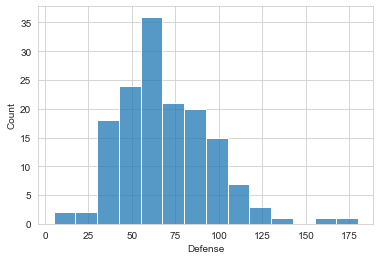

In [8]:
sns.histplot(data=pokemon, x='Defense')

In [9]:
stats = pokemon[['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']]

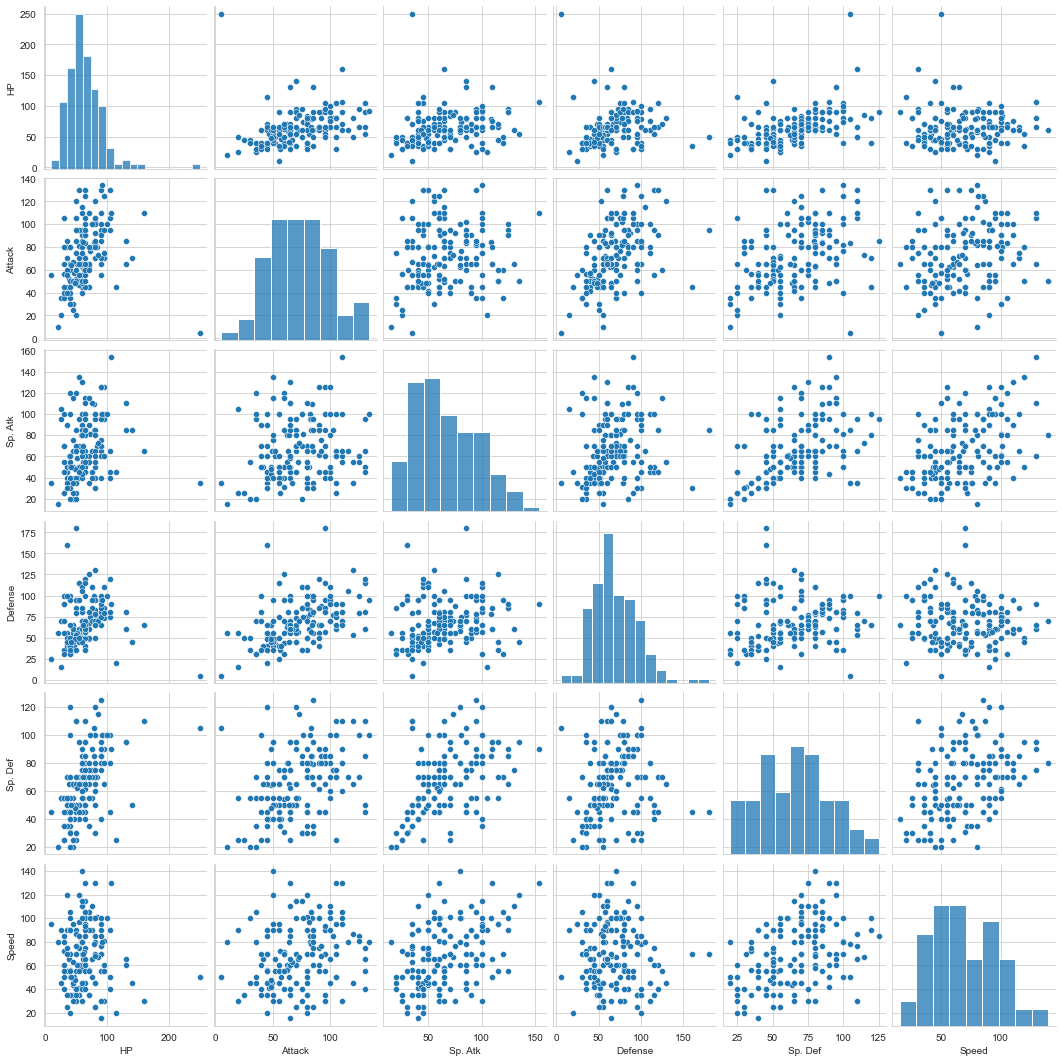

In [10]:
sns.pairplot(pokemon[['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']])

<AxesSubplot:>

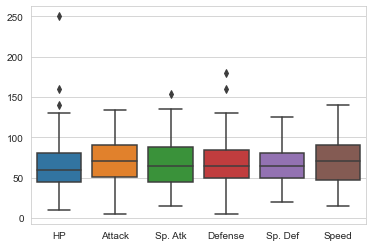

In [11]:
sns.boxplot(data=stats)

In [12]:
# we see that HP, Sp. Attack, and Defence have outliers in a positive direction
q1 = pokemon['HP'].quantile(0.25)
q3 = pokemon['HP'].quantile(0.75)
upper = q3 * 1.5
pokemon[pokemon['HP'] > upper]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,2,False
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,2,False
143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False


In [13]:
q1 = pokemon['Sp. Atk'].quantile(0.25)
q3 = pokemon['Sp. Atk'].quantile(0.75)
upper = q3 * 1.5
pokemon[pokemon['Sp. Atk'] > upper]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,3,False
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


In [14]:
q1 = pokemon['Defense'].quantile(0.25)
q3 = pokemon['Defense'].quantile(0.75)
upper = q3 * 1.5
pokemon[pokemon['Defense'] > upper]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
76,Golem,Rock,Ground,495,80,120,130,55,65,45,3,False
91,Cloyster,Water,Ice,525,50,95,180,85,45,70,2,False
95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False


<AxesSubplot:>

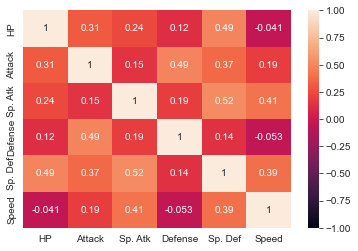

In [16]:
# let us check the correlation between different pokemon stats
corr = stats.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [17]:
# what about type and stats or stage and stats
# we can use phi_k correlation
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [19]:
pokemon.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary'],
      dtype='object')

In [25]:
everything_but_name = pokemon[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
                                    'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary']]
phik_overview = everything_but_name.phik_matrix(interval_cols=['Total', 'HP', 'Attack', 'Defense',
                                                               'Sp. Atk', 'Sp. Def', 'Speed'])
phik_overview.round(2)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Type 1,1.00,0.85,0.48,0.00,0.00,0.00,0.55,0.40,0.19,0.00,0.35
Type 2,0.85,1.00,0.00,0.56,0.00,0.54,0.00,0.00,0.00,0.00,0.00
Total,0.48,0.00,1.00,0.61,0.74,0.60,0.87,0.77,0.55,0.70,0.89
HP,0.00,0.56,0.61,1.00,0.58,0.54,0.41,0.56,0.13,0.47,0.43
Attack,0.00,0.00,0.74,0.58,1.00,0.61,0.38,0.45,0.00,0.42,0.11
Defense,0.00,0.54,0.60,0.54,0.61,1.00,0.31,0.52,0.00,0.55,0.13
Sp. Atk,0.55,0.00,0.87,0.41,0.38,0.31,1.00,0.75,0.62,0.56,0.73
Sp. Def,0.40,0.00,0.77,0.56,0.45,0.52,0.75,1.00,0.24,0.49,0.53
Speed,0.19,0.00,0.55,0.13,0.00,0.00,0.62,0.24,1.00,0.26,0.24
Stage,0.00,0.00,0.70,0.47,0.42,0.55,0.56,0.49,0.26,1.00,0.07


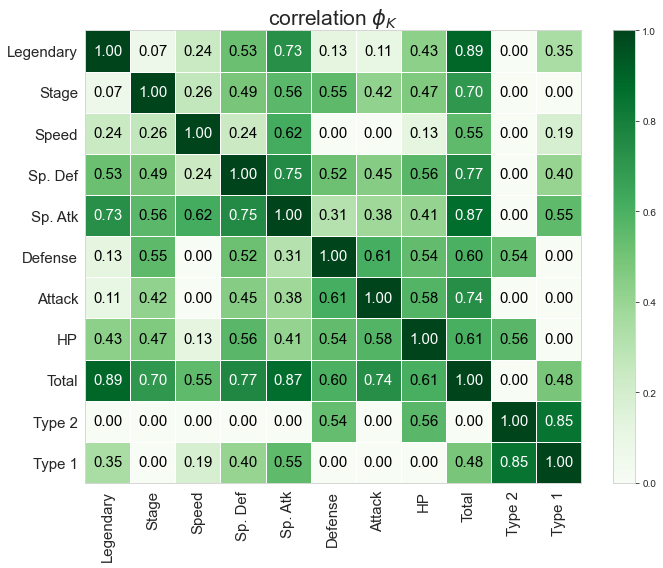

In [22]:
plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=1.5,
                        figsize=(10, 8))

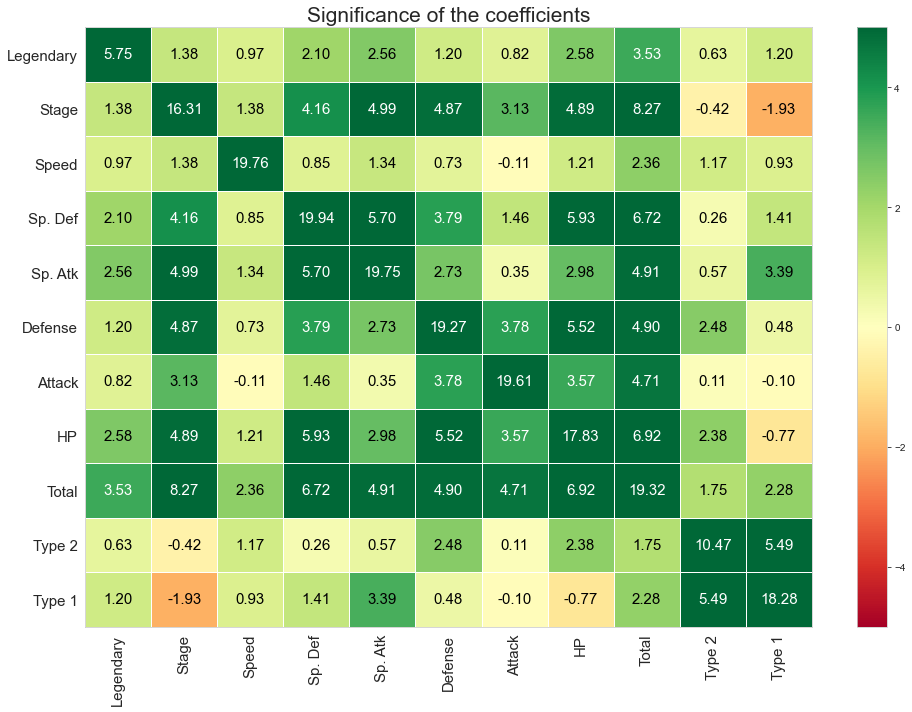

In [26]:
significance_overview = everything_but_name.significance_matrix(interval_cols=['Total', 'HP', 'Attack', 'Defense',
                                                                               'Sp. Atk', 'Sp. Def', 'Speed'])
plot_correlation_matrix(significance_overview.fillna(0).values,
                        x_labels=significance_overview.columns,
                        y_labels=significance_overview.index,
                        vmin=-5, vmax=5, title="Significance of the coefficients",
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

In [27]:
mushrooms = pd.read_csv('./data/mushrooms.csv')

In [28]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [29]:
from scipy import stats
from collections import Counter

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * np.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = stats.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


In [ ]:
cols = mushrooms.columns